In [28]:
from data_utils import generate_psf_complex_fields, compute_output_fluxes_from_complex_field, compute_mode_coefficients_from_complex_field
from psf_constants import PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_COMPLEX_FIELDS_PREFIX, \
                          VALIDATION_COMPLEX_FIELDS_PATH, \
                          TEST_COMPLEX_FIELDS_PATH, \
                          TRAIN_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_OUTPUT_FLUXES_FILE_PATH, \
                          NUMPY_SUFFIX

hola


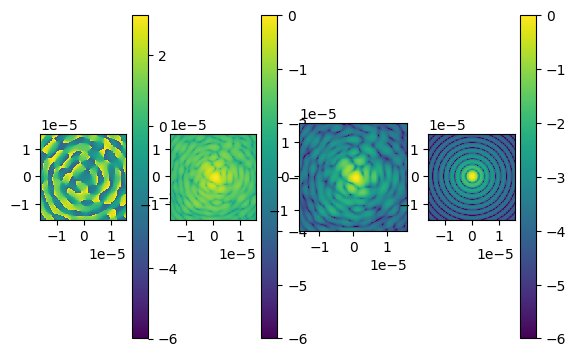

In [2]:
generate_psf_complex_fields('./test_cf.npy', plot=True, n_samples=100, save_wavefront_phase=True)

Total number of unique modes found: 19


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:207: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))


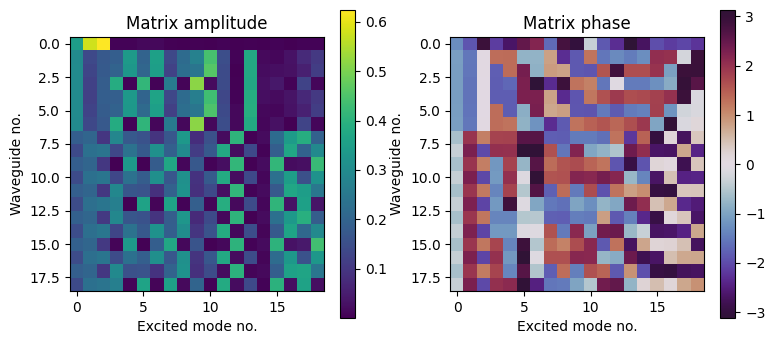

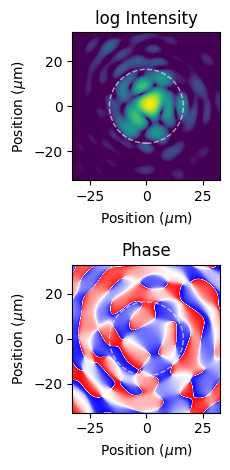

In [3]:
compute_output_fluxes_from_complex_field('./test_cf.npy', './test_of.npy')

In [5]:
import numpy as np

In [10]:
def compute_rmse(phases):
    zero_matrix = np.zeros_like(phases)  
    mse = np.mean((phases - zero_matrix)**2)
    rmse = np.sqrt(mse)
    return rmse

In [11]:
phases = np.load('./test_cf_phases.npy')
rmse_list = []
for phase in phases:
    rmse_list.append(compute_rmse(phase))



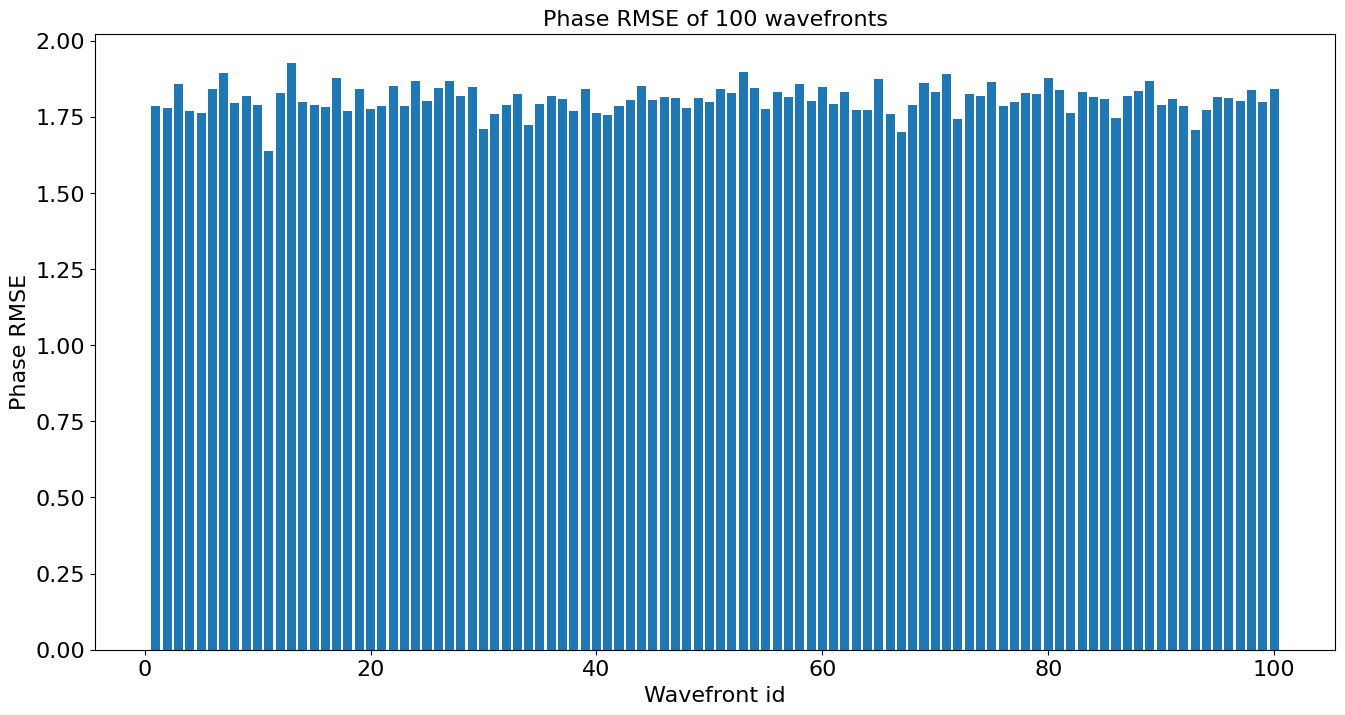

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 101)], rmse_list)
plt.xlabel('Wavefront id', fontsize=16)
plt.ylabel('Phase RMSE', fontsize=16)
plt.title('Phase RMSE of 100 wavefronts',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

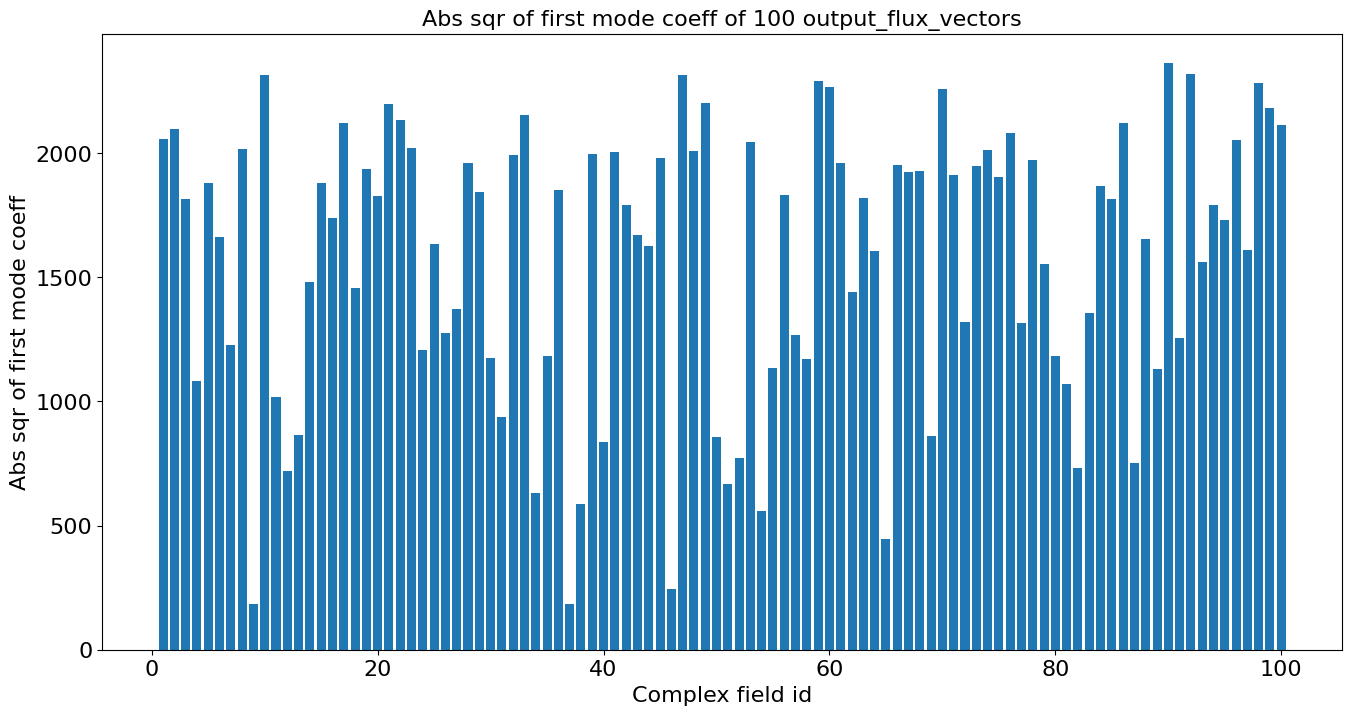

In [37]:
plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 101)], np.abs(first_mode_coeffs)**2)
plt.xlabel('Complex field id', fontsize=16)
plt.ylabel('Abs sqr of first mode coeff', fontsize=16)
plt.title('Abs sqr of first mode coeff of 100 output_flux_vectors',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [17]:
output_fluxes = np.load('./test_of.npy')

In [18]:
def compute_L2_norms_modified(complex_vectors_list):
    L2_sum_list = []
    intensity_sum_list = []
    
    for complex_vector in complex_vectors_list:
        intensity_sum_list.append(np.sum(np.abs(complex_vector)**2)) # Total amount of flux in the image
        L2_sum_list.append(np.sum(np.abs(complex_vector)**4))
        
    return intensity_sum_list, L2_sum_list

In [19]:
intensities_sum_list, L2_sum_list = compute_L2_norms_modified(output_fluxes)

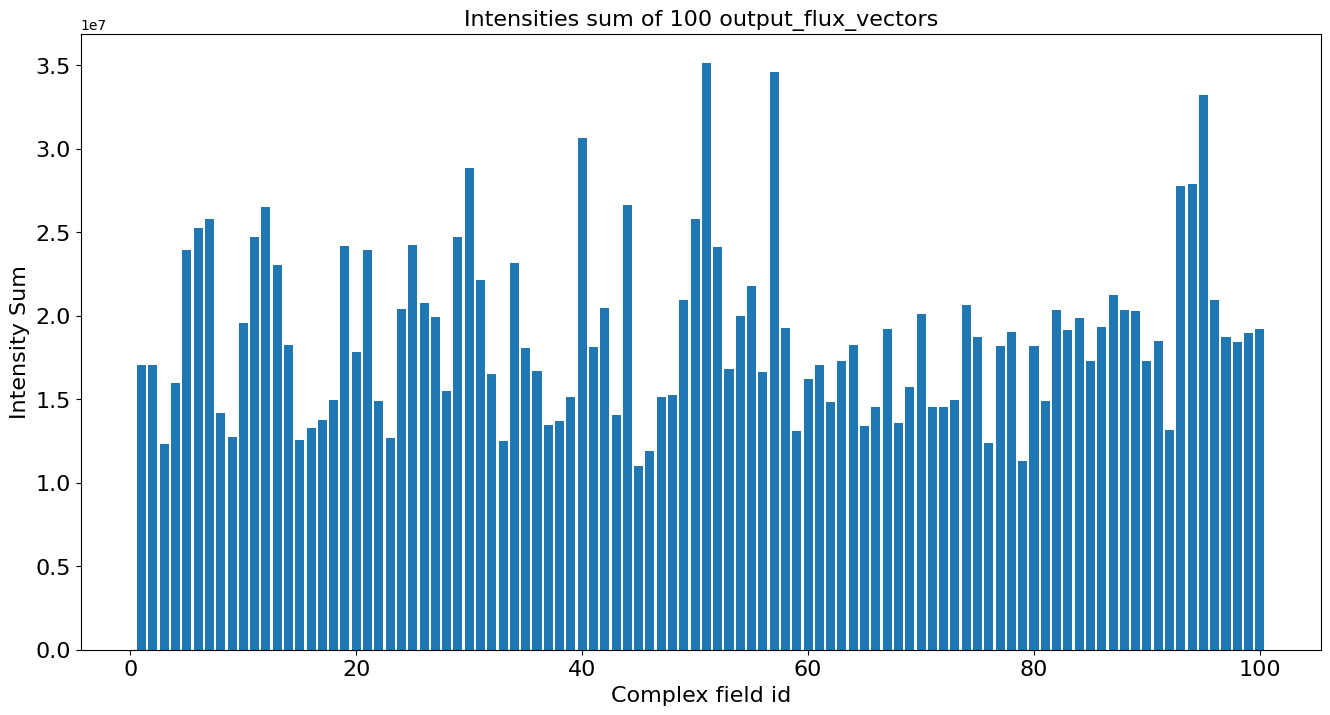

In [25]:
plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 101)], intensities_sum_list)
plt.xlabel('Complex field id', fontsize=16)
plt.ylabel('Intensity Sum', fontsize=16)
plt.title('Intensities sum of 100 output_flux_vectors',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

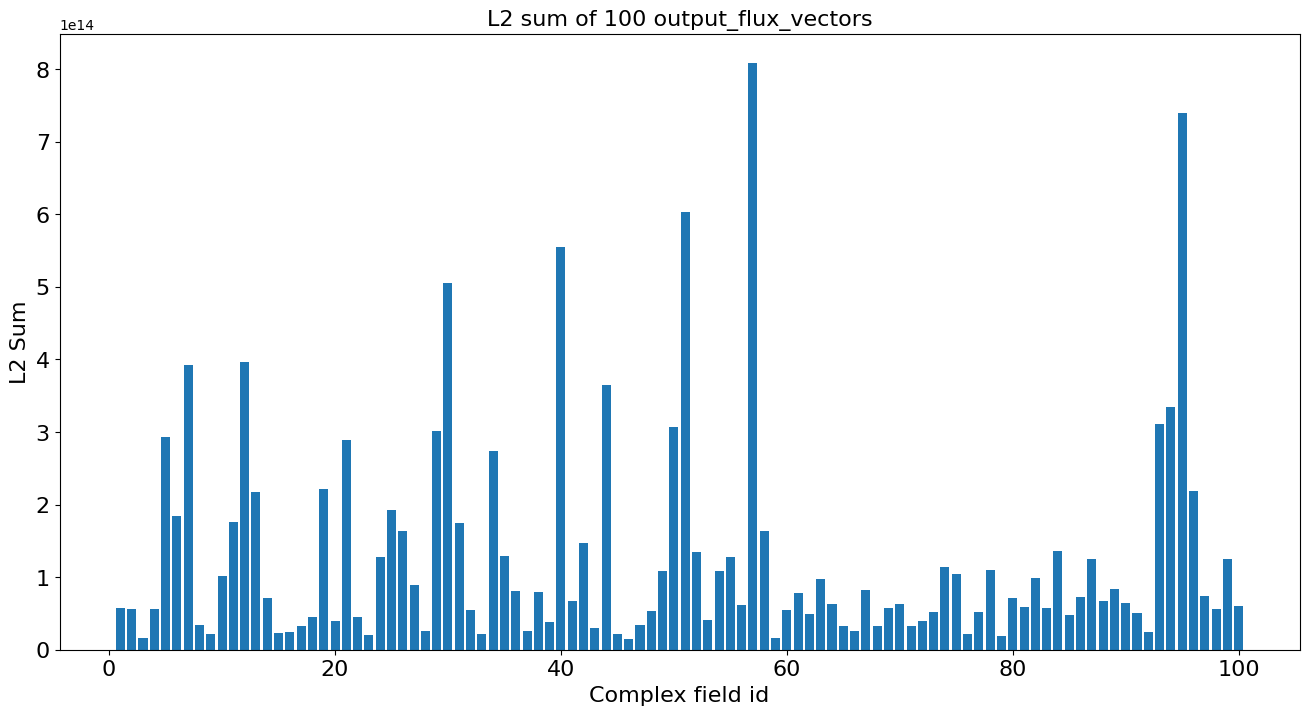

In [26]:
plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 101)], L2_sum_list)
plt.xlabel('Complex field id', fontsize=16)
plt.ylabel('L2 Sum', fontsize=16)
plt.title('L2 sum of 100 output_flux_vectors',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Total number of unique modes found: 19


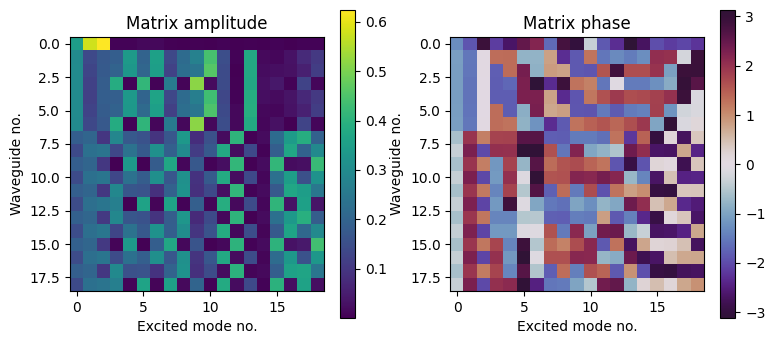

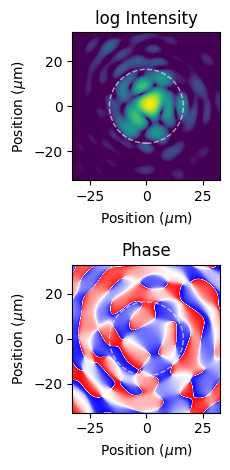

In [29]:

mode_coefficients_list = compute_mode_coefficients_from_complex_field('./test_cf.npy')

In [33]:
np_mode_coeffs = np.array(mode_coefficients_list)

In [34]:
np_mode_coeffs.shape

(100, 19)

In [35]:
first_mode_coeffs = np_mode_coeffs[:,0]